# Taller No. 1

Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import sklearn.neural_network as snn
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

## Regresión traditional

### Scikit-learn

Cargando conjunto de datos

In [2]:
dataset = datasets.fetch_california_housing()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=0)
Xtrain = zscore(Xtrain, axis=0)
Xtest = zscore(Xtest, axis=0)

Creación del modelo y entrenamiento

0.30155486980822177

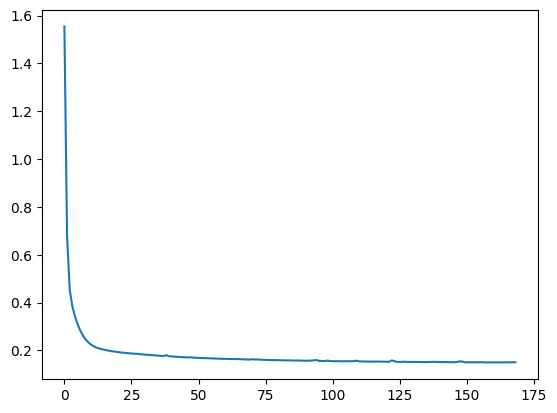

In [3]:
mdl = snn.MLPRegressor(hidden_layer_sizes=(30), max_iter=500)
mdl.fit(Xtrain, Ytrain)
plt.plot(mdl.loss_curve_)
metrics.mean_squared_error(Ytrain, mdl.predict(Xtrain))

Evaluation del modelo

In [4]:
metrics.mean_squared_error(Ytest, mdl.predict(Xtest))

0.3851431280566641

### Pytorch

Adaptación de los datos

In [5]:
Xtrain = torch.FloatTensor(Xtrain)
Ytrain = torch.FloatTensor(Ytrain).reshape(-1, 1)
Xtest = torch.FloatTensor(Xtest)
Ytest = torch.FloatTensor(Ytest).reshape(-1, 1)
trainloader = DataLoader(list(zip(Xtrain, Ytrain)), batch_size=20, shuffle=True)

Creación del modelo

In [6]:
model = nn.Sequential(
    nn.Linear(8, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Entrenamiento del modelo

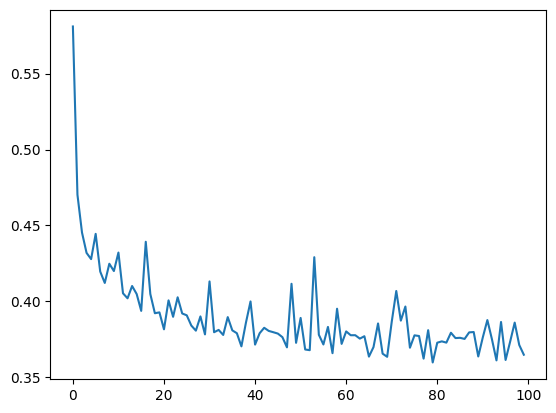

In [7]:
lossTest = []
for epoch in range(100):
    model.train()
    for input, output in trainloader:
        y_hat = model(input)
        loss = loss_fn(y_hat, output)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    y_hat = model(Xtest)
    loss = loss_fn(y_hat, Ytest)
    lossTest.append(float(loss))
plt.plot(lossTest);

## Clasificación traditional

### Scikit-learn

Cargando conjunto de datos

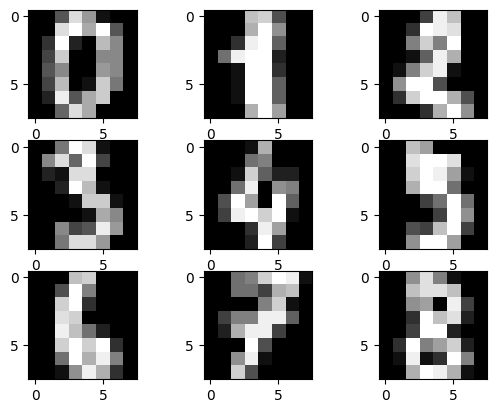

In [8]:
digits = datasets.load_digits()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(digits.images[i], cmap='gray')

In [9]:
data = digits.images.reshape((len(digits.images), -1))/255
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, digits.target, test_size=0.3)

Creación del modelo y entrenamiento

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


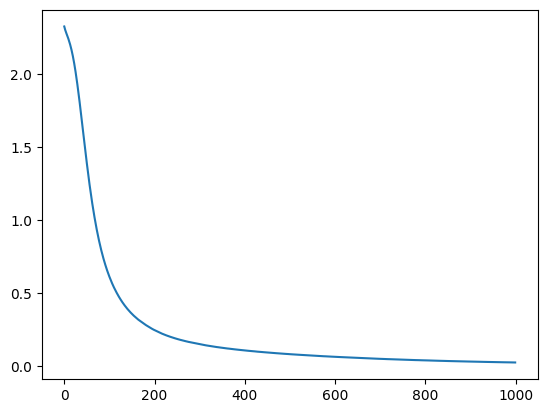

In [10]:
clf = snn.MLPClassifier(hidden_layer_sizes=(80), max_iter=1000)
clf.fit(Xtrain, Ytrain)
p = plt.plot(clf.loss_curve_);

Evaluacion del modelo

In [11]:
Y_hat = clf.predict(Xtest)
print(metrics.classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.92      0.97      0.94        60
           2       0.93      0.98      0.95        51
           3       1.00      0.92      0.96        63
           4       1.00      0.96      0.98        56
           5       0.95      0.98      0.96        54
           6       1.00      0.96      0.98        46
           7       0.98      1.00      0.99        49
           8       0.96      0.91      0.93        47
           9       0.97      0.98      0.97        57

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



Matriz de confusión

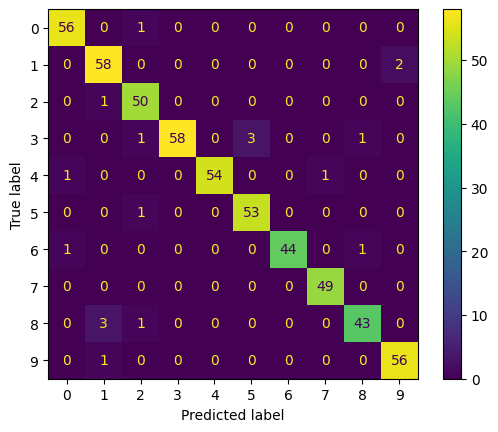

In [12]:
cm = metrics.confusion_matrix(Ytest, Y_hat, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

### Pytorch

Adaptación de los datos

In [13]:
Xtrain = torch.FloatTensor(Xtrain)
Ytrain = torch.LongTensor(Ytrain)
Xtest = torch.FloatTensor(Xtest)
Ytest = torch.LongTensor(Ytest)
trainloader = DataLoader(list(zip(Xtrain, Ytrain)), batch_size=100, shuffle=True)

Creación del modelo

In [14]:
model = nn.Sequential(
    nn.Linear(Xtrain.shape[1], 50),
    nn.ReLU(),
    nn.Linear(50, 30),
    nn.ReLU(),
    nn.Linear(30, 10)
)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Entrenamiento del modelo

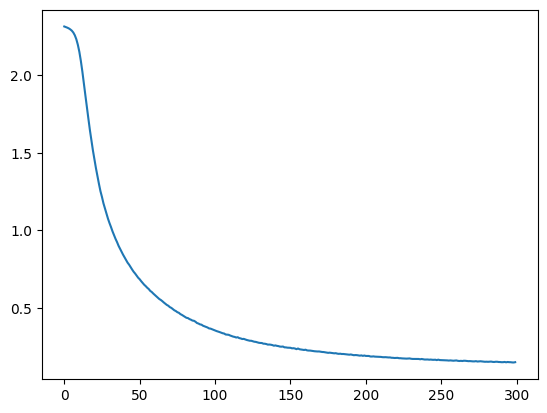

In [15]:
lossTest = []
for epoch in range(300):
    model.train()
    for input, output in trainloader:
        y_hat = model(input)
        loss = loss_fn(y_hat, output)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    y_hat = model(Xtest)
    loss = loss_fn(y_hat, Ytest)
    lossTest.append(float(loss))
plt.plot(lossTest);

Model evaluation

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       0.93      0.93      0.93        60
           2       0.94      0.98      0.96        51
           3       0.98      0.89      0.93        63
           4       0.98      0.95      0.96        56
           5       0.93      1.00      0.96        54
           6       1.00      0.98      0.99        46
           7       0.94      0.98      0.96        49
           8       0.93      0.89      0.91        47
           9       0.91      0.93      0.92        57

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



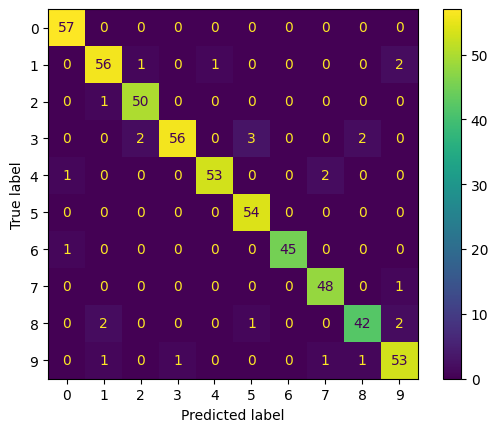

In [16]:
Y_hat = model(Xtest).detach().numpy().argmax(axis=1)
print(metrics.classification_report(Ytest, Y_hat))
cm = metrics.confusion_matrix(Ytest, Y_hat, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
p = disp.plot()

## Tarea a completar

Generación de conjunto de datos

In [ ]:
x = np.linspace(0, 3*np.pi, 500)
y = np.sin(x) + np.random.normal(0, 0.2, len(x))
p = plt.plot(x, y)
x = x.reshape(-1,1)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=0)

Crear el modelo y entrenar

In [ ]:
#TODO


Evaluar el modelo (Asumiento que `Y_hat` es la predicción de `Xtest`)

In [ ]:
plt.plot(x, y)
plt.plot(Xtest, Y_hat, "*")
metrics.mean_squared_error(Ytest, Y_hat)